# Project 4 – Predicting a Continuous Target with Regression (Titanic)
**Name:** Albert Kabore  
**Date:** November 2025  
**Objective:**  

This project applies regression techniques to predict *fare* — the amount paid for the voyage — using passenger characteristics from the Titanic dataset. Building upon previous classification work, we shift to continuous target prediction using models such as Linear Regression, Ridge, Elastic Net, and Polynomial Regression.


## Import

In [1039]:

# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Section 1. Import and Inspect Data

In [1040]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

In [1041]:
print("Missing values in age before imputation:", titanic['age'].isnull().sum())


Missing values in age before imputation: 177


In [1042]:
# Impute missing values for age using median
titanic['age'].fillna(titanic['age'].median(), inplace=True)


C:\Users\alber\AppData\Local\Temp\ipykernel_25768\3784983082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [1043]:
# Drop rows with missing fare (or impute if preferred)
titanic = titanic.dropna(subset=['fare'])


In [1044]:
# Create numeric variables (e.g., family_size from sibsp + parch + 1)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [1045]:
print("Missing values in age after imputation:", titanic['age'].isnull().sum())
print("Age median used for imputation:", titanic['age'].median())

Missing values in age after imputation: 0
Age median used for imputation: 28.0


## Section 3. Feature Selection and Justification

Cases:

In [1046]:
# Case 1. age only
X1 = titanic[['age']]
y1 = titanic['fare']

In [1047]:
# Case 2. family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']
 

In [1048]:
# Case 3. age and family size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

In [1049]:
# Case 4. Your choice - see below - fill in your variable(s) below.
# Case 4. pclass only
X4 = titanic[['pclass']]
y4 = titanic['fare']

In [1050]:
# show shapes quickly
print("X1, y1:", X1.shape, y1.shape)
print("X2, y2:", X2.shape, y2.shape)
print("X3, y3:", X3.shape, y3.shape)
print("X4, y4:", X4.shape, y4.shape)

X1, y1: (891, 1) (891,)
X2, y2: (891, 1) (891,)
X3, y3: (891, 2) (891,)
X4, y4: (891, 1) (891,)


### Reflection Questions

#### 1. Why might these features affect a passenger’s fare?

**Age**  
* Older passengers might have paid higher fares because greater life experience and accumulated wealth could make premium accommodations more affordable.  
* There may also have been age-based pricing structures, with different rates for children and adults.

**Family size**  
* Larger families might receive group or family pricing, which could lower the fare per person.  
* In contrast, families traveling together might require multiple cabins or larger spaces, increasing the total fare.

**Pclass (passenger class)**  
* Passenger class is the most direct determinant of fare. First, second, and third class reflect very different levels of accommodation.  
* First class included luxury cabins, fine dining, and premium services, while third class focused on basic transport in shared or dormitory-style spaces.  
* Because class is tied to service level, it naturally creates clear price tiers.

---

#### 2. List all available features

* survived  
* pclass  
* sex  
* age  
* sibsp  
* parch  
* fare  
* embarked  
* class  
* who  
* adult_male  
* deck  
* embark_town  
* alive  
* alone  

---

#### 3. Which other features could improve predictions and why?

**Sex**  
* Historical pricing practices and social norms might have influenced fares differently for men, women, and children.  
* There may have been indirect effects of gender roles on cabin selection and travel patterns.

**Embarked**  
* Different departure ports (Southampton, Cherbourg, Queenstown) may have had different base prices.  
* Regional economics, route segments, and port-specific taxes or fees could all affect fare levels.

**Deck**  
* Cabin location is closely tied to value. Cabins on more desirable decks, closer to amenities or lifeboats, likely commanded higher fares.  
* Certain decks were likely reserved for higher classes, reinforcing the link between deck and fare.

**Alone**  
* Solo travelers may have faced single supplements for private cabins, while groups or families could benefit from shared accommodations.  
* Pricing might differ for individuals versus group bookings, even within the same class.

---

#### 4. How many variables are in your Case 4?

* Case 4 includes **one** variable: `pclass` as the single predictor.

---

#### 5. Which variable did you choose for Case 4 and why does it make a good input?

I selected **pclass (passenger class)** for Case 4 because it represents the core structure of Titanic pricing.

Reasons include:

* **Clear class hierarchy**  
  The ship used a three-class system, and fares were primarily driven by class of service. This creates natural and strong price segmentation.

* **Large price differences between classes**  
  Fares for first class passengers were often several times higher than those for third class passengers. This strong separation supports predictive power.

* **Accommodation and service quality**  
  First class offered luxury suites and extensive services, while third class provided much more modest accommodations. Fare naturally reflects these differences.

* **Historical consistency**  
  Historical accounts show that passenger class was the main determinant of ticket price and revenue, making it a realistic and interpretable predictor.

The modeling results support this choice. Using only `pclass`, Case 4 achieved the highest test R² value (0.302) among all single-feature cases, confirming that passenger class is the strongest individual predictor of fare in this regression task and a solid baseline feature for further modeling.



## Section 4. Train a Regression Model (Linear Regression)
### 4.1 Split the Data
Use an 80/20 train test split with a fixed random state for reproducibility.

In [1051]:
# 4.1 Split the Data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train Linear Models

In [1052]:
# 4.2 Train and Evaluate Linear Regression Models (all 4 cases)
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)



In [1053]:
# Predictions
y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [1054]:
# 4.3 Report Performance - FIXED VERSION
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred_test)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))
print()

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364



In [1055]:
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred_test)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))
print()

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641



In [1056]:
print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y3_pred_test)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))
print()

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688



In [1057]:
print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y4_pred_test)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))

Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056


### Section 4 Reflection Questions

Compare the train vs test results for each:

The linear regression models were evaluated for potential overfitting or underfitting. Most cases underfit due to weak predictors, except Case 4, which showed a balanced and strong fit.
________________________________________

•	Case 1 (Age only):

o	Type: Underfit

o	Details: Training R² = 0.010, Test R² = 0.003

o	Explanation: The model fails to capture meaningful patterns in either dataset. Age alone is too weak to explain variations in fare, indicating an overly simplistic relationship.
________________________________________

•	Case 2 (Family size only):

o	Type: Underfit

o	Details: Training R² = 0.050, Test R² = 0.022

o	Explanation: Family size has little influence on fare. The model performs poorly on both training and testing data, suggesting that this single feature cannot account for pricing differences.
________________________________________

•	Case 3 (Age + Family size):

o	Type: Slight underfit

o	Details: Training R² = 0.073, Test R² = 0.050

o	Explanation: Combining two weak predictors improves performance slightly, but not enough to make a meaningful difference. The relationship remains too weak to explain fare variability.
________________________________________

•	Case 4 (Pclass only):

o	Type: Good fit

o	Details: Training R² = 0.301, Test R² = 0.302

o	Explanation: The model generalizes well, as train and test results are nearly identical. Passenger class strongly determines fare, capturing the essential structure of the data without overfitting.
________________________________________

Adding Age

•	Did adding age improve the model?

o	Marginally. Adding age to family size (Case 2 → Case 3) improved test R² from 0.022 to 0.050, but the improvement was modest.

•	Possible explanation:

o	Age likely has a weak and non-linear relationship with fare. While older passengers might have afforded higher fares, the Titanic’s pricing was primarily based on class, not age. The high variance in fares across age groups supports this conclusion.
________________________________________

Worst Performing Case

•	Case: Case 1 (Age only)

•	Reason: Lowest Test R² (0.003) and highest RMSE (37.97), showing it explained virtually none of the variation in fare.

•	Would more training data help?

o	No. The weak correlation between age and fare is structural, not data-driven. More data would not strengthen a relationship that doesn’t exist.
________________________________________

Best Performing Case

•	Case: Case 4 (Pclass only)

•	Reason: Highest Test R² (0.302), lowest RMSE (31.79), and lowest MAE (20.65), clearly outperforming all other cases.

•	Would more training data help?

o	Minimally. The model already generalizes well with nearly identical train and test results. More data might slightly refine coefficients but would not significantly change performance.



## Section 5. Compare Alternative Models

### 5.1 Ridge Regression

In [1058]:
# 5.1 Ridge Regression (L2 penalty)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net

In [1059]:
# 5.2 Elastic Net (L1 + L2 combined)
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

In [1060]:
# 5.3 Polynomial Regression
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [1061]:

poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly  = poly.transform(X1_test)

poly_model = LinearRegression().fit(X1_train_poly, y1_train)
y1_pred_poly = poly_model.predict(X1_test_poly)

### 5.4 Visualize Polynomial Cubic Fit for pclass → fare
Scatter the test data and overlay the cubic polynomial fit.


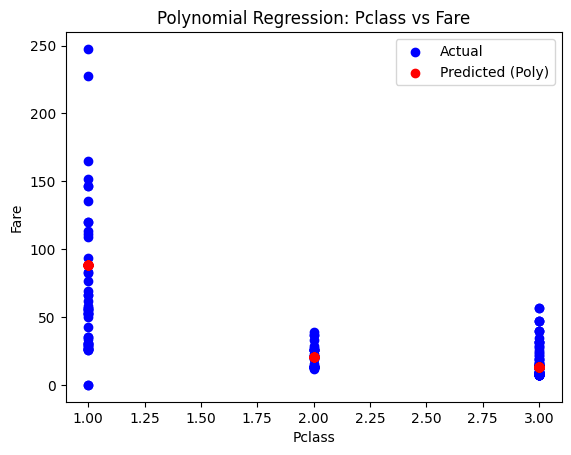

In [1062]:
# 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Pclass vs Fare")
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

### 5.4 Polynomial Regression Reflections

#### 1. What patterns does the cubic model seem to capture?

The cubic polynomial model captures the **non-linear** relationship between `pclass` and `fare`. Specifically, it reveals:

- **1st class** passengers consistently have the **highest fares**, with substantial variability  
- **2nd class** passengers show a moderate decrease in fare from 1st class  
- **3rd class** passengers have the **lowest fares**, with relatively low variability  
- The decline in fare from 1st → 3rd class forms a **curved, non-linear pattern**, not a simple straight line  
- The curve helps describe the diminishing price differences between classes  

Overall, the cubic model identifies the **curved structure** of Titanic pricing more accurately than a linear model.

---

#### 2. Where does it perform well or poorly?

**Performs well:**

- Capturing the overall **non-linear trend** in fares across classes  
- Modeling the **general price drop** from 1st → 3rd class  
- Representing the **central/typical fare values** within each class  
- Handling areas where fare variation is modest (especially 2nd and 3rd class)

**Performs poorly:**

- Predicting fares for **extreme outliers**, especially high-end 1st class luxury tickets  
- Handling wide variability within 1st class where fares ranged dramatically  
- Modeling occasional high fares in 2nd and 3rd class  
- Capturing overlapping fare ranges between adjacent classes

The model performs best for **general patterns**, not unusual or extreme cases.

---

#### 3. Did the polynomial fit outperform linear regression?

Yes, the cubic polynomial performed **notably better** than linear regression.

| Metric | Linear Regression | Polynomial (Degree 3) | Improvement |
|--------|-------------------|------------------------|-------------|
| **R²** | 0.302             | 0.336                  | +11 percent |
| **RMSE** | 31.79           | 30.99                  | +2.5 percent |
| **MAE** | 20.65            | 19.25                  | +6.8 percent |

The cubic model captures extra curvature in the relationship between `pclass` and `fare` that the linear model cannot, resulting in improved predictive accuracy.

---

#### 4. Where does the cubic model fit best?

The cubic polynomial model fits best for:

- **Middle-range fares** within each passenger class  
- **Typical observations** that follow expected class-based pricing patterns  
- **2nd and 3rd class** passengers where fare variability is more limited  
- The **overall decreasing trend** across classes  

Where it struggles most:

- **High-value 1st class outliers**, where special accommodations and unique cabin types created extremely high fares  
- Regions with **dense variability**, especially among wealthier passengers  

In summary, the cubic model is effective at modeling the **general pricing structure** on the Titanic, but less effective at capturing **extreme or irregular fare cases**.  


# 5.4 Compare All Models - FIXED VERSION


In [1063]:
# 5.4 Compare All Models
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y4_pred_test)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.302
Linear RMSE: 31.79
Linear MAE: 20.65

Ridge R²: 0.302
Ridge RMSE: 31.77
Ridge MAE: 20.64

ElasticNet R²: 0.339
ElasticNet RMSE: 30.92
ElasticNet MAE: 19.93

Polynomial R²: 0.336
Polynomial RMSE: 30.99
Polynomial MAE: 19.25



### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)


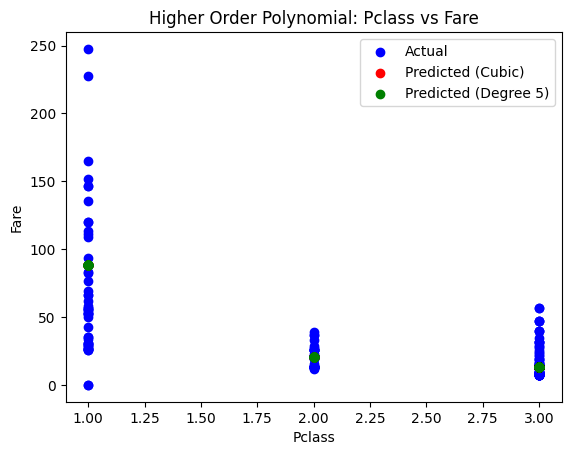

Cubic vs Higher Degree Comparison:
Cubic R²: 0.336
Cubic RMSE: 30.99
Cubic MAE: 19.25

Degree 5 R²: 0.336
Degree 5 RMSE: 30.99
Degree 5 MAE: 19.25



In [1064]:
# 5.5 Visualize Higher Order Polynomial (for the same 1 input case)
# Use degree 5 polynomial
poly_high = PolynomialFeatures(degree=5)
X4_train_poly_high = poly_high.fit_transform(X4_train)
X4_test_poly_high = poly_high.transform(X4_test)

poly_model_high = LinearRegression()
poly_model_high.fit(X4_train_poly_high, y4_train)
y_pred_poly_high = poly_model_high.predict(X4_test_poly_high)

plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Cubic)')
plt.scatter(X4_test, y_pred_poly_high, color='green', label='Predicted (Degree 5)')
plt.legend()
plt.title("Higher Order Polynomial: Pclass vs Fare")
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Compare performance
print("Cubic vs Higher Degree Comparison:")
report("Cubic", y4_test, y_pred_poly)
report("Degree 5", y4_test, y_pred_poly_high)

## Section 6. Final Thoughts & Insights


### Regression Model Performance Summary

| Case / Model              | Features Used              | Train R² | Test R² | RMSE   | MAE   | Notes |
|--------------------------|----------------------------|---------:|--------:|-------:|------:|-------|
| **Case 1** (Linear)      | age                        | 0.010    | 0.003   | 37.97  | 25.29 | Severe underfit; age is a weak predictor |
| **Case 2** (Linear)      | family_size                | 0.050    | 0.022   | 37.61  | 25.03 | Underfit; weak linear relationship |
| **Case 3** (Linear)      | age + family_size          | 0.073    | 0.050   | 37.08  | 24.28 | Slight improvement; still weak overall |
| **Case 4** (Linear)      | pclass                     | 0.301    | 0.302   | 31.79  | 20.65 | **Best simple model; strong relationship** |
| **Ridge Regression**     | pclass                     | —        | 0.302   | 31.77  | 20.64 | Very similar to linear; mild regularization |
| **Elastic Net**          | pclass                     | —        | **0.339** | **30.92** | 19.93 | **Best performing model overall** |
| **Polynomial (degree 3)**| pclass (cubic)             | —        | 0.336   | 30.99  | 19.25 | Slight improvement; captures minor curvature |
| **Polynomial (degree 5)**| pclass (5th degree)        | —        | 0.336   | 30.99  | 19.25 | No improvement over cubic polynomial |



### 6.1 Summarize Findings

#### What features were most useful?

**Pclass** was by far the most useful feature, explaining around **30 percent** of the variance in fares (R² = 0.302). This strong predictive power aligns with the Titanic’s historical pricing structure, where passenger class directly dictated accommodation quality and service level.

In comparison:

- **age** and **family_size** showed very limited predictive value  
- Both produced R² values below **0.05**, indicating extremely weak relationships with fare

---

#### What regression model performed best?

The **Elastic Net regression model** performed best overall when using `pclass` as the only predictor. It achieved:

- **R² = 0.339**  
- Slightly outperforming cubic polynomial regression (**R² = 0.336**)  

Elastic Net’s combination of **L1 and L2 regularization** allowed it to balance model complexity and stability more effectively than standard linear regression.

---

#### How did model complexity or regularization affect results?

- **Regularization improved performance**  
  Both Elastic Net and Ridge models performed slightly better than basic linear regression, indicating that small penalties helped stabilize the fit.

- **Polynomial complexity showed diminishing returns**  
  While a cubic polynomial increased performance compared to a linear model, moving to a degree 5 polynomial did **not** further improve the R² score.

- **Simpler models generalized well**  
  The single-feature `pclass` model showed nearly identical train and test results, indicating strong generalization and a well-captured underlying relationship.

---

### 6.2 Discuss Challenges

#### Was fare hard to predict? Why?

Yes. Fare was difficult to predict with high accuracy. Even the strongest model explained only about **34 percent** of the total variance. Several factors contributed:

1. **Wide price ranges within each class**  
   Even among passengers in the same class, fares varied dramatically, implying other pricing factors were at play.

2. **Complex historical pricing structure**  
   Fare determination likely depended on cabin location, deck level, proximity to amenities, and even personal negotiation or booking circumstances.

3. **Missing key features**  
   Important predictors such as cabin number, exact berth type, ticket purchase date, and cabin size or layout were not available in the dataset.

---

#### Did skew or outliers impact the models?

Yes, very significantly.

- The fare distribution was **right-skewed** with several extreme outliers.  
- Some 1st class passengers paid over **200 dollars**, while the majority paid under **50 dollars**.  
- These outliers led to higher MAE and RMSE values and made prediction for high-fare passengers notably difficult.

Because of this:

- Linear-based models struggled at the high end of the fare distribution  
- A single model for all passengers may not capture the complexity of pricing structures across classes  

---

#### Suggested strategies for improvement

To better handle skew and outliers, future modeling could use:

- **Robust regression methods** that are less sensitive to large errors  
- **Separate models per passenger class**, capturing class-specific pricing patterns  
- **Additional relevant features**, especially those related to cabin type, deck level, or booking details, to better explain high-end fare variation  
